# ML Practical On Naive Bayes and Decision Tree

## 1) Use “naïve_bayes_classification” dataset. Build a naïve bayes classification model to predict whether a person is diabetic based on glucose and bloodpressure attribute values

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.shape

(768, 9)

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
glucose =df.iloc[:,1].values
bp = df.iloc[:,2].values

In [10]:
X=df.iloc[:,::-1].values
y=df.iloc[:,-1]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=1)

In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X=le.fit_transform(glucose)
X=X.reshape(-1,1)

In [13]:
y=le.fit_transform(bp)
y=y.reshape(-1,1)

In [14]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
y_pred= model.predict(X_test)

In [15]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 1.0


In [16]:
test_pred = model.predict(X_test)

In [17]:
print(metrics.classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00        85

    accuracy                           1.00       231
   macro avg       1.00      1.00      1.00       231
weighted avg       1.00      1.00      1.00       231



# 2) Use iris dataset and create a classification model using Gaussian naïve bayes classifier. Compare the result of Naïve bayes Classifier with the Decision tree classifier.

In [18]:
ir =pd.read_csv('Iris.csv')

In [19]:
ir.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
ir.shape

(150, 6)

In [21]:
ir.drop(columns="Id",inplace=True)

In [22]:
ir.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [23]:
ir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [24]:
ir.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


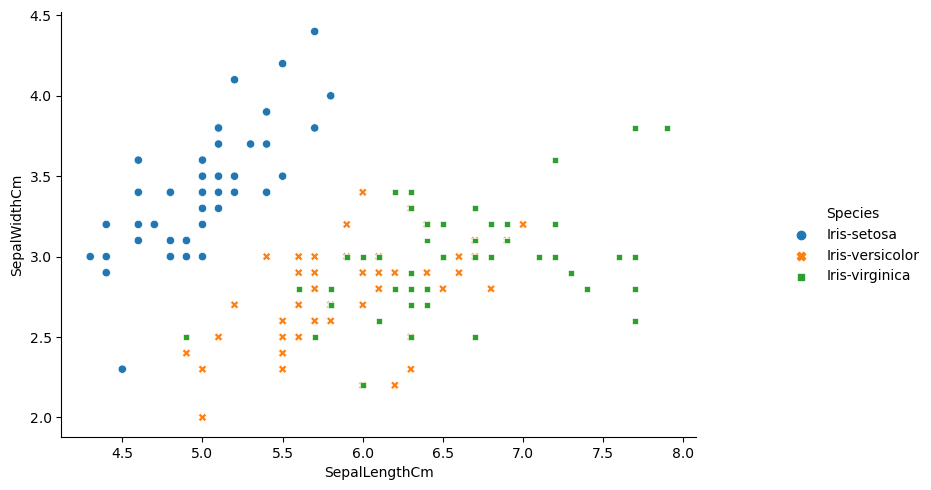

In [25]:
g=sns.relplot(x='SepalLengthCm',y='SepalWidthCm',data=ir,hue='Species',style='Species')
g.fig.set_size_inches(10,5)
plt.show()

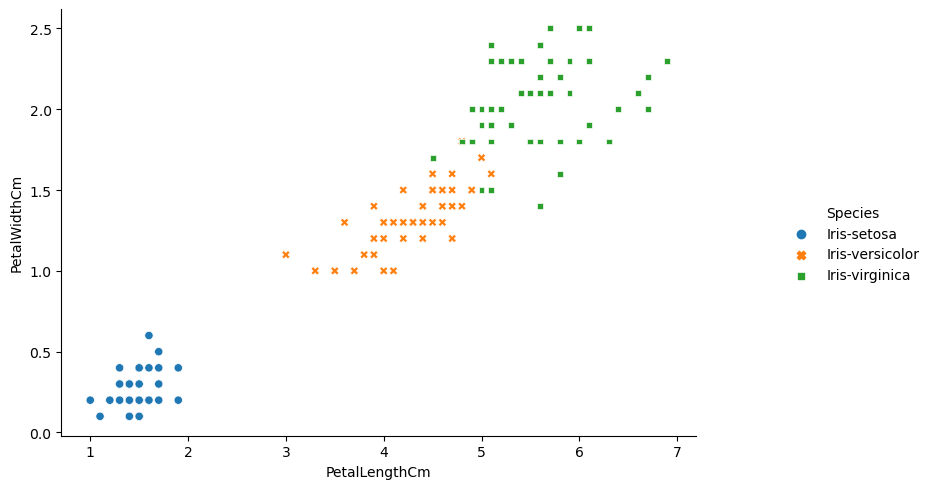

In [26]:
g=sns.relplot(x='PetalLengthCm',y='PetalWidthCm',data=ir,hue='Species',style='Species')
g.fig.set_size_inches(10,5)
plt.show()

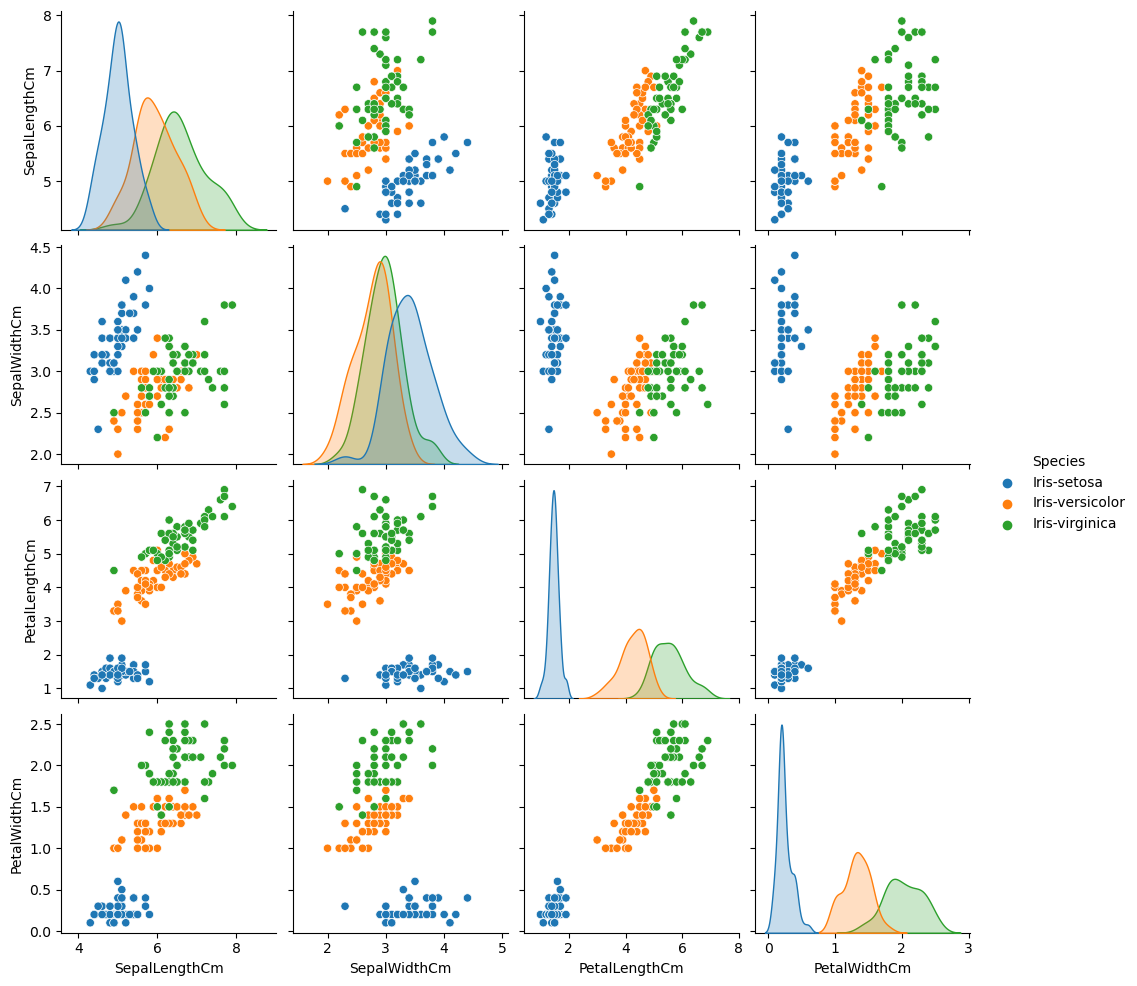

In [27]:
sns.pairplot(ir,hue="Species")
plt.show()

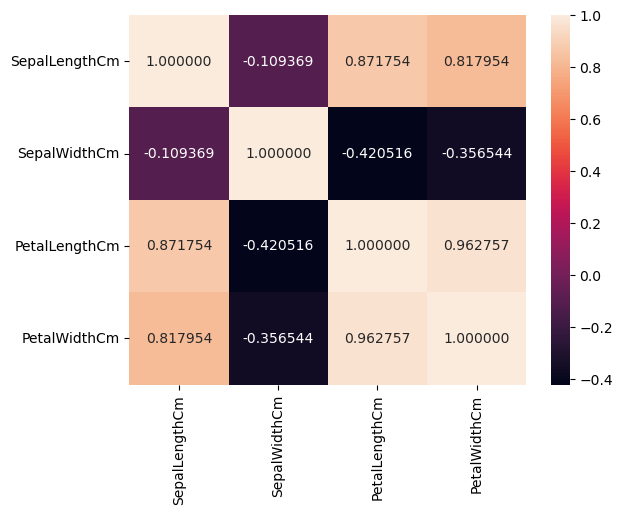

In [28]:

sns.heatmap(ir.corr(),annot=True,fmt="f")
plt.show()

In [29]:
X=ir.iloc[:,0:4].values
y=ir.iloc[:,4].values

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [32]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

GaussianNB()

In [33]:
Y_pred = gaussian.predict(X_test)

In [34]:
from sklearn.metrics import make_scorer, accuracy_score,precision_score
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
accuracy = accuracy_score(y_test,Y_pred)

In [35]:
accuracy

1.0

In [36]:
from sklearn.tree import DecisionTreeClassifier


In [37]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  
Y_pred = decision_tree.predict(X_test) 

In [38]:
accuracy_dt=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

In [39]:
accuracy = accuracy_score(y_test,Y_pred)

In [40]:
accuracy

0.9777777777777777

# Naïve bayes Classifier has Accuracy 1.0 
# Decision tree classifier has Accuracy 0.977
# Best Model is given by Naive Bayes100% Accuracy

# 3) Use breast cancer dataset and apply Gaussian naïve bayes to create a classification model for predicting whether a person suffers from cancer or not. Check the accuracy of your model.

In [41]:
d = pd.read_csv( 'Breast Cancer.csv')

In [42]:
d.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [43]:
d.shape

(569, 33)

In [44]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [45]:
d.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [46]:
d = d.drop(["id"], axis = 1)

In [47]:
d = d.drop(["Unnamed: 32"], axis = 1)

In [48]:
d = d.drop(["diagnosis"], axis = 1)

In [49]:
d

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [50]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [51]:
X = df.iloc[:, 0:-1]
y = df.iloc[:,-1]

In [52]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 999)

In [53]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [54]:
clf.score(X_val, y_val)

0.7727272727272727

# 4) Use titanic dataset. Use the attributes: Class of the room, Sex, Age, number of siblings/spouses, number of parents/children, passenger fare and port of embarkation information. Compare the result of Naïve bayes Classifier with the Decision tree classifier. (Easy)

In [55]:
T = pd.read_csv("titanic.csv")

In [56]:
T.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [57]:
T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [58]:
T.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
deck        688
dtype: int64

In [59]:
T.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [60]:
T['sex'] = T['sex'].replace(["female", "male"], [0, 1])
T['embarked'] = T['embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])
T=T.drop(["deck"], axis = 1)

In [61]:
T['embarked'] = T['embarked'].fillna(0)
T['age'] = T['age'].fillna(0)

In [62]:
T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    int64  
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


In [63]:
X = T.iloc[:,:-1].values
y = T.iloc[:,-1].values

In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [66]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score
acc= accuracy_score(y_test,Y_pred)

In [68]:
acc

0.5559701492537313

In [69]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [70]:
Y_pred = decision_tree.predict(X_test) 

In [71]:
accu = accuracy_score(y_test,Y_pred)

In [72]:
accu

0.8097014925373134

# 5) Use the given dataset, which consists of weather, temp and play as attributes. Perform the following task:
# i. Apply data pre-processing and convert categorical values into numeric values.
# ii. Use the list “weather”, “temp” as features and “play” as target. Try to create a model using Naïve bayes classifier to predict whether a person plays the game depending upon the values of weather and temperature.


In [73]:
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny', 'Rainy','Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [74]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
wheather_encoded=le.fit_transform(weather)
print (wheather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [75]:
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)
print ("Temp:",temp_encoded)
print ("Play:",label)

Temp: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [76]:
features=list(zip(wheather_encoded,temp_encoded))
print (features)

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


In [77]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(features,label)

GaussianNB()

In [78]:
predicted= model.predict([[0,1]])
print("Predicted Value:", predicted)

Predicted Value: [1]


# Consider the following problem: In AB Company, there is a salary distribution table based on Year of Experience as given in “salary_dataset.csv”. “The scenario is you are a HR officer; you got a candidate with 5 years of experience. Then what is the best salary you should offer to him?” (very difficult)

In [79]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [80]:
S = pd.read_csv("salary_data.csv")
S.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [81]:
S.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [82]:
x= S.iloc[:, :-1].values  
y= S.iloc[:, 1].values

In [83]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 1/3, random_state=0)

In [84]:
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(x_train, y_train)

LinearRegression()

In [85]:
y_pred= regressor.predict(x_test)  
x_pred= regressor.predict(x_train)

In [86]:
regressor.score(x_train, y_train)

0.9381900012894278

In [87]:
regressor.score(x_test, y_test)

0.9749154407708353

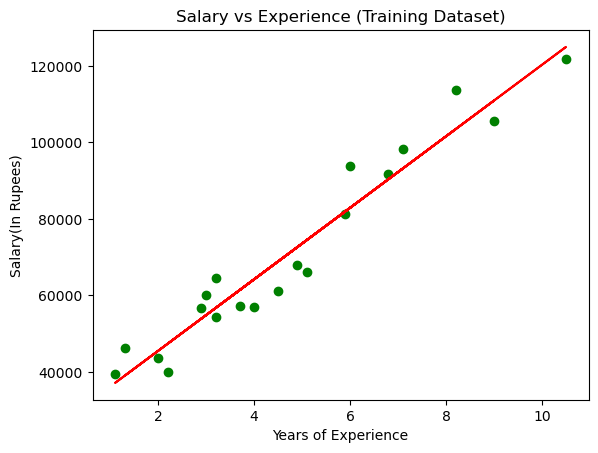

Train Score:  0.9381900012894278


In [88]:
plt.scatter(x_train, y_train, color="green")   
plt.plot(x_train, x_pred, color="red")    
plt.title("Salary vs Experience (Training Dataset)")  
plt.xlabel("Years of Experience")  
plt.ylabel("Salary(In Rupees)")  
plt.show()  
print('Train Score: ', regressor.score(x_train, y_train))

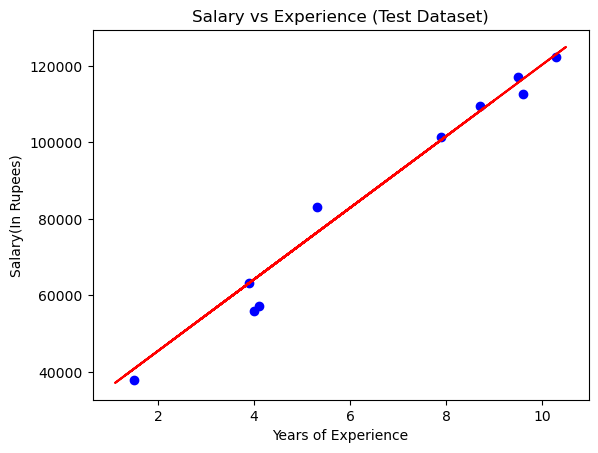

Test Score:  0.9749154407708353


In [89]:
#visualizing the Test set results  
plt.scatter(x_test, y_test, color="blue")   
plt.plot(x_train, x_pred, color="red")    
plt.title("Salary vs Experience (Test Dataset)")  
plt.xlabel("Years of Experience")  
plt.ylabel("Salary(In Rupees)")  
plt.show()
print('Test Score: ', regressor.score(x_test, y_test))